In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from collections import defaultdict
from collections import Counter
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
MNIST = pd.read_csv("Numbers.txt", delim_whitespace=True)

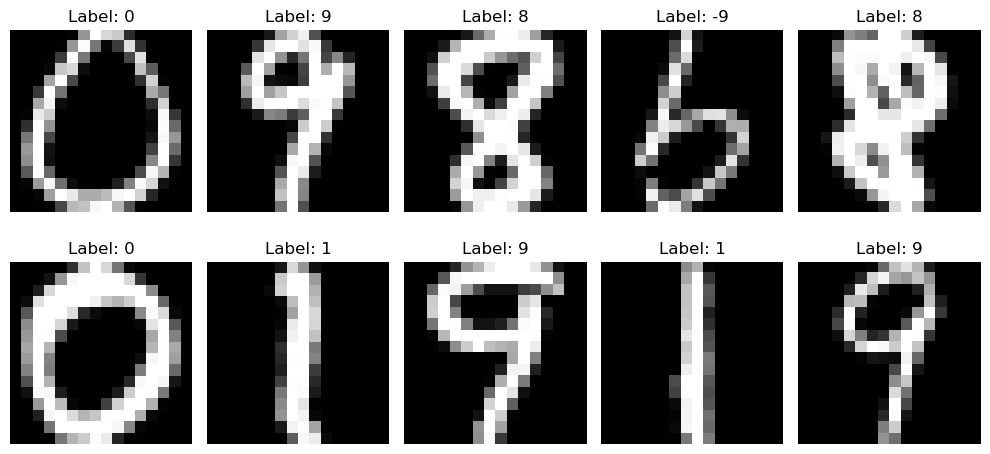

In [3]:
# Separate the label (first column) and the image pixels (remaining columns)
labels = MNIST.iloc[:, 0].astype(int).values
images = MNIST.iloc[:, 1:].values

img_dim = int(np.sqrt(images.shape[1]))
# Plot some images (for example, the first 10)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Reshape the flat image into 16x16
    img = images[i].reshape(img_dim, img_dim)
    # Show the image. Using cmap='gray' for better visualization.
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
catdog = pd.read_csv('catdogdata.txt', sep=' ').values

In [8]:
labels_cd = np.zeros(catdog.shape[0])
labels_cd[99:] = 1  # 0 for cats, 1 for dogs

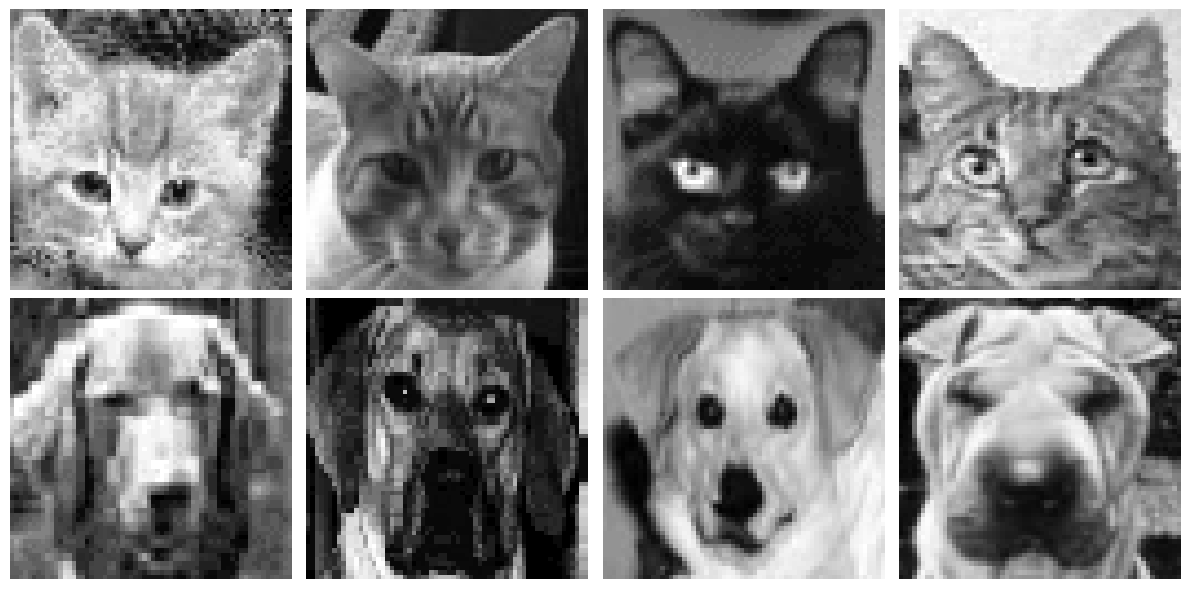

In [9]:
def rotateM(img):
   return np.rot90(img, k=-1)

np.random.seed(0)

ssc = np.random.choice(np.where(labels_cd == 0)[0], 4, replace=False)
ssd = np.random.choice(np.where(labels_cd == 1)[0], 4, replace=False)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i , idx in enumerate([ssc[0], ssc[1], ssc[2], ssc[3], ssd[0], ssd[1], ssd[2], ssd[3]]):
   img = catdog[idx].reshape(64, 64)
   img = rotateM(img)
   ax = axs[i // 4, i % 4]
   ax.imshow(img, cmap='gray')
   ax.axis('off') 

plt.tight_layout()
plt.show()

### Part1

#### MNIST - F-test and Lasso


==================== RUN 1/3 ====================

--- Filtering ---
Classifier: Logistic Regression
Optimal number of features: 250 (Best CV score: 0.9119)
Classifier: SVM
Optimal number of features: 200 (Best CV score: 0.9031)
Classifier: Random Forest
Optimal number of features: 150 (Best CV score: 0.9206)

--- Running Embedded (Lasso with Logistic Regression) ---
Classifier: Logistic Regression
Optimal C: 0.46415888336127775 (Best CV score: 0.9050)
Selected Features: 185

==================== RUN 2/3 ====================

--- Filtering ---
Classifier: Logistic Regression
Optimal number of features: 200 (Best CV score: 0.9212)
Classifier: SVM
Optimal number of features: 150 (Best CV score: 0.9100)
Classifier: Random Forest
Optimal number of features: 250 (Best CV score: 0.9319)

--- Running Embedded (Lasso with Logistic Regression) ---
Classifier: Logistic Regression
Optimal C: 0.46415888336127775 (Best CV score: 0.9213)
Selected Features: 179

==================== RUN 3/3 ========

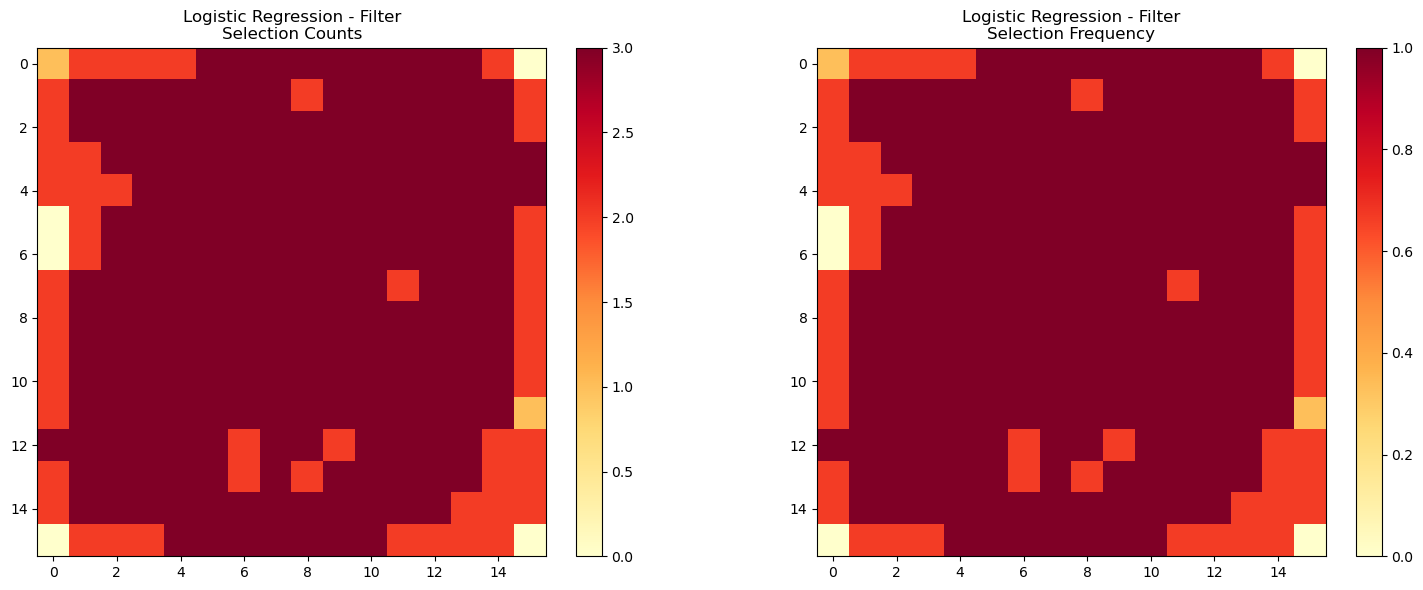


Classifier: Logistic Regression - Method: Lasso
Top 10 most frequently selected features:
  1. Feature 104 - Selected 3.0/3 times (100.0%)
  2. Feature 106 - Selected 3.0/3 times (100.0%)
  3. Feature 107 - Selected 3.0/3 times (100.0%)
  4. Feature 108 - Selected 3.0/3 times (100.0%)
  5. Feature 182 - Selected 3.0/3 times (100.0%)
  6. Feature 181 - Selected 3.0/3 times (100.0%)
  7. Feature 229 - Selected 3.0/3 times (100.0%)
  8. Feature 228 - Selected 3.0/3 times (100.0%)
  9. Feature 105 - Selected 3.0/3 times (100.0%)
  10. Feature 113 - Selected 3.0/3 times (100.0%)


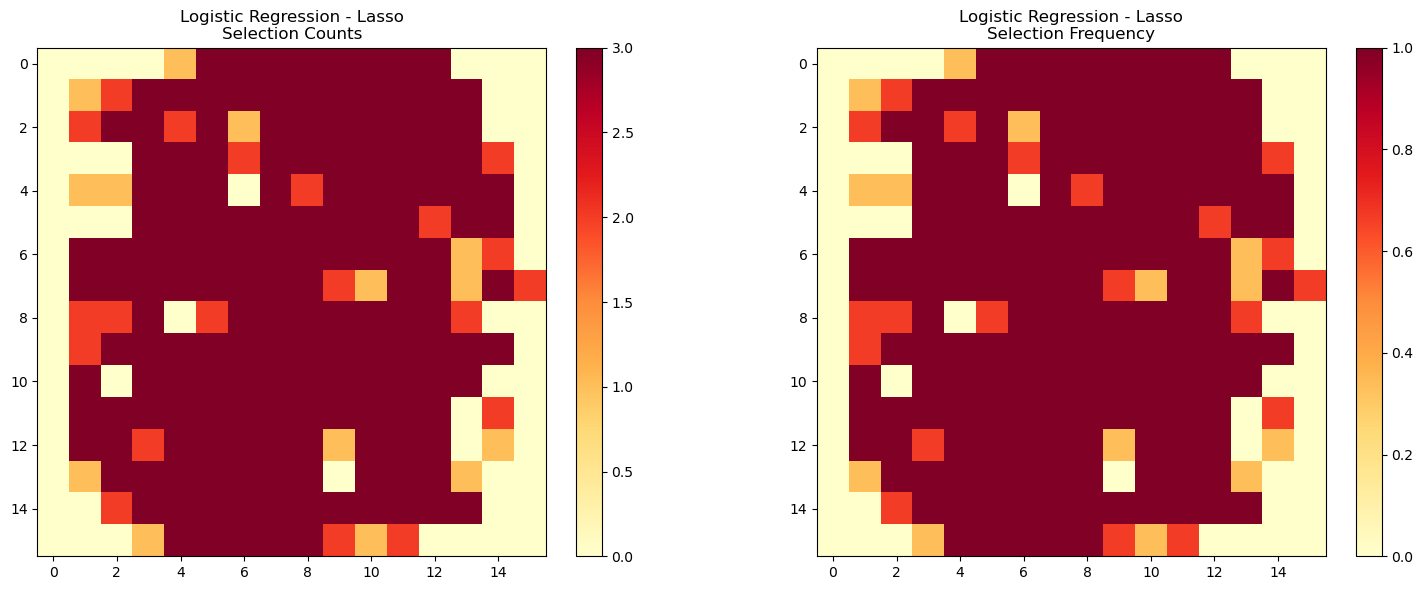


Classifier: SVM - Method: Filter
Top 10 most frequently selected features:
  1. Feature 106 - Selected 3.0/3 times (100.0%)
  2. Feature 125 - Selected 3.0/3 times (100.0%)
  3. Feature 126 - Selected 3.0/3 times (100.0%)
  4. Feature 228 - Selected 3.0/3 times (100.0%)
  5. Feature 129 - Selected 3.0/3 times (100.0%)
  6. Feature 130 - Selected 3.0/3 times (100.0%)
  7. Feature 131 - Selected 3.0/3 times (100.0%)
  8. Feature 134 - Selected 3.0/3 times (100.0%)
  9. Feature 135 - Selected 3.0/3 times (100.0%)
  10. Feature 136 - Selected 3.0/3 times (100.0%)


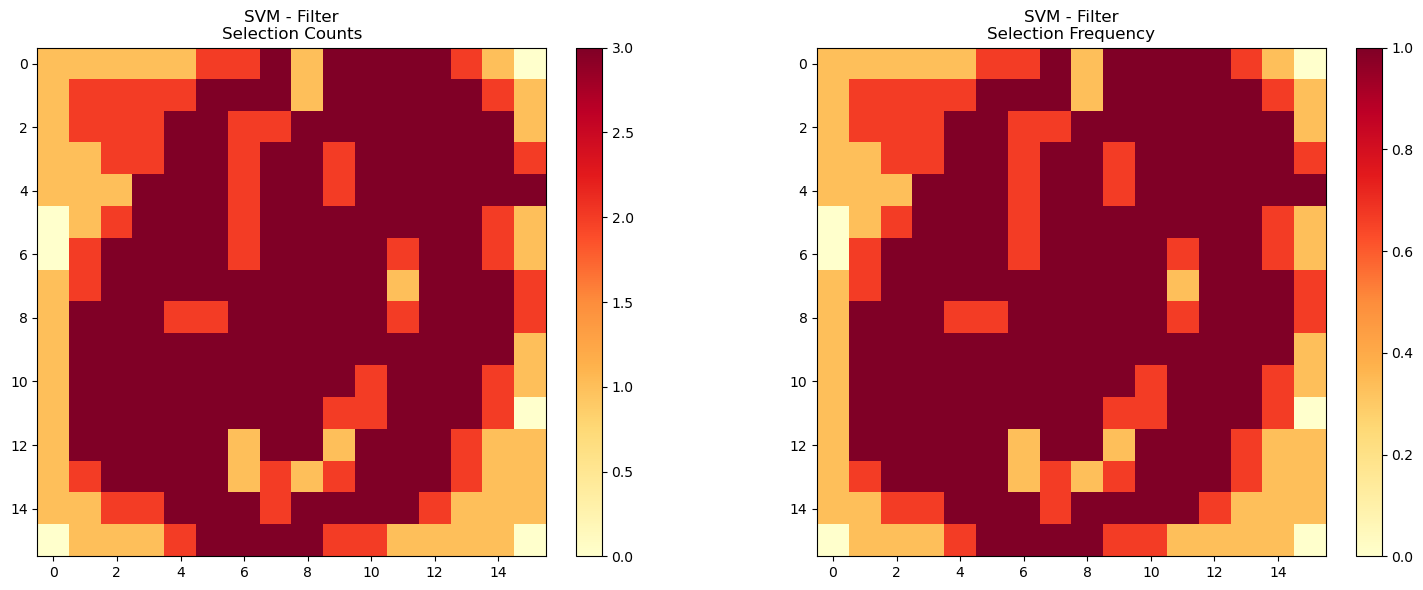


Classifier: Random Forest - Method: Filter
Top 10 most frequently selected features:
  1. Feature  92 - Selected 3.0/3 times (100.0%)
  2. Feature 116 - Selected 3.0/3 times (100.0%)
  3. Feature 117 - Selected 3.0/3 times (100.0%)
  4. Feature 203 - Selected 3.0/3 times (100.0%)
  5. Feature 119 - Selected 3.0/3 times (100.0%)
  6. Feature 120 - Selected 3.0/3 times (100.0%)
  7. Feature 121 - Selected 3.0/3 times (100.0%)
  8. Feature 202 - Selected 3.0/3 times (100.0%)
  9. Feature 124 - Selected 3.0/3 times (100.0%)
  10. Feature 115 - Selected 3.0/3 times (100.0%)


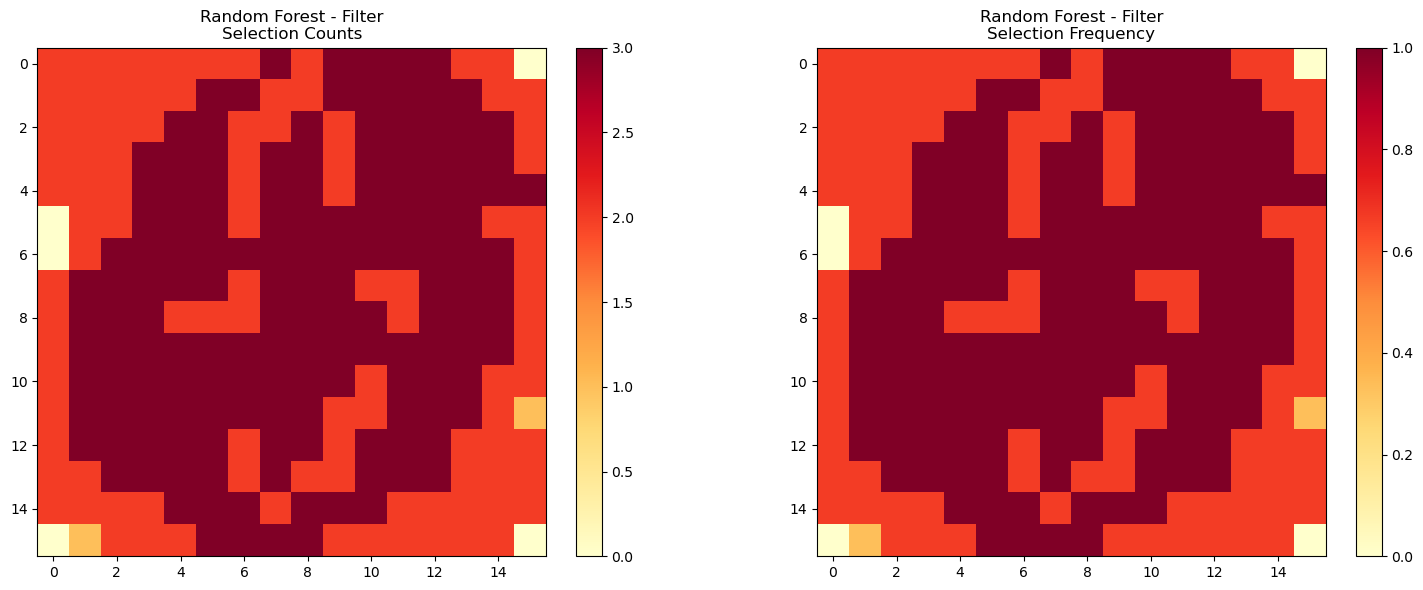

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration ---
N_RUNs = 3  # Number of runs for the experiment
CV_FOLDS = 5  # Number of folds for cross-validation

# --- Define the models ---
LR = LogisticRegression(solver='liblinear', max_iter=200)
SVM = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000)
RF = RandomForestClassifier(n_estimators=100)

classifiers = {
    "Logistic Regression": LR,
    "SVM": SVM,
    "Random Forest": RF
}

# 1. Filtering: SelectKBest with ANOVA F-value
filter_pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', None)
])
K_values = [50, 100, 150, 200, 250]
filter_param_grid = {'selector__k': K_values}

# 2. Embedding: Lasso(Logistic Regression with L1 penalty)
lasso_pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=200))
])
C_values = np.logspace(-3, 1, 7)
lasso_param_grid = {'classifier__C': C_values}

# 初始化结果存储结构
results = defaultdict(lambda: defaultdict(lambda: {
    'num_features': [],
    'selected_indices': [],
    'feature_counts': np.zeros(256),  # store counts of selected features
    'feature_freq': np.zeros(256)     # store frequency of selected features
}))

# --- Run the experiments ---
for run in range(N_RUNs):
    print(f"\n{'='*20} RUN {run+1}/{N_RUNs} {'='*20}")
    current_random_state = run * 42
    
    x_train, x_test, y_train, y_test = train_test_split(
        images, labels, test_size=0.2, random_state=current_random_state)
    
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=current_random_state)

    # --- Method 1: Filtering ---
    print("\n--- Filtering ---")
    for clf_name, clf in classifiers.items():
        print(f"Classifier: {clf_name}")
        filter_pipeline.set_params(classifier=clf)
        
        grid_search = GridSearchCV(
            filter_pipeline, 
            filter_param_grid,
            cv=cv, 
            scoring='accuracy', 
            n_jobs=-1
        )
        grid_search.fit(x_train, y_train)

        best_k = grid_search.best_params_['selector__k']
        best_selector = SelectKBest(score_func=f_classif, k=best_k)
        best_selector.fit(x_train, y_train)
        selected_indices = best_selector.get_support(indices=True)

        # update feature selection statistics
        results[clf_name]['Filter']['feature_counts'][selected_indices] += 1
        results[clf_name]['Filter']['feature_freq'][selected_indices] += 1/N_RUNs
        
        results[clf_name]['Filter']['num_features'].append(best_k)
        results[clf_name]['Filter']['selected_indices'].append(selected_indices)

        print(f"Optimal number of features: {best_k} (Best CV score: {grid_search.best_score_:.4f})")

    # --- Method 2: Embedding ---
    print("\n--- Running Embedded (Lasso with Logistic Regression) ---")
    clf_name = "Logistic Regression"
    print(f"Classifier: {clf_name}")

    grid_search_lasso = GridSearchCV(
        lasso_pipeline, 
        lasso_param_grid,
        cv=cv, 
        scoring='accuracy', 
        n_jobs=-1
    )
    grid_search_lasso.fit(x_train, y_train)

    best_C = grid_search_lasso.best_params_['classifier__C']
    best_lasso_model = grid_search_lasso.best_estimator_.named_steps['classifier']

    non_zero_coeffs = np.sum(np.abs(best_lasso_model.coef_), axis=0) > 1e-10
    num_selected = np.sum(non_zero_coeffs)
    selected_indices = np.where(non_zero_coeffs)[0]

    # update feature selection statistics
    results[clf_name]['Lasso']['feature_counts'][selected_indices] += 1
    results[clf_name]['Lasso']['feature_freq'][selected_indices] += 1/N_RUNs
    
    results[clf_name]['Lasso']['num_features'].append(num_selected)
    results[clf_name]['Lasso']['selected_indices'].append(selected_indices)

    print(f"Optimal C: {best_C} (Best CV score: {grid_search_lasso.best_score_:.4f})")
    print(f"Selected Features: {num_selected}")

# --- visualizition ---
def plot_combined_feature_selection(feature_counts, feature_freq, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # plotting the feature counts and frequency
    im1 = ax1.imshow(feature_counts.reshape(16, 16), cmap='YlOrRd', interpolation='nearest')
    ax1.set_title(f"{title}\nSelection Counts")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    
    # plot the heatmap for feature frequency
    im2 = ax2.imshow(feature_freq.reshape(16, 16), cmap='YlOrRd', interpolation='nearest')
    ax2.set_title(f"{title}\nSelection Frequency")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()

# --- Analysis ---
print("\n=== Combined Feature Selection Results ===")
for clf_name in classifiers.keys():
    for method_name in results[clf_name].keys():
        if len(results[clf_name][method_name]['selected_indices']) > 0:
            print(f"\nClassifier: {clf_name} - Method: {method_name}")
            
            # get the statistics results
            counts = results[clf_name][method_name]['feature_counts']
            freq = results[clf_name][method_name]['feature_freq']
            
            # print the most frequently selected features
            top_features = np.argsort(-counts)[:10]  # the top 10 features
            print("Top 10 most frequently selected features:")
            for i, feat in enumerate(top_features):
                print(f"  {i+1}. Feature {feat:3d} - Selected {counts[feat]}/{N_RUNs} times ({freq[feat]:.1%})")
            
            # plot the comprehensive feature selection results
            plot_combined_feature_selection(
                counts, 
                freq,
                f"{clf_name} - {method_name}"
            )


#### CatDogs - F-test and Lasso


==================== RUN 1/3 ====================

--- Filtering ---
Classifier: Logistic Regression
Optimal number of features: 4000 (Best CV score: 0.8661)
Classifier: SVM
Optimal number of features: 3000 (Best CV score: 0.8089)
Classifier: Random Forest
Optimal number of features: 4000 (Best CV score: 0.8282)

--- Running Embedded (Lasso with Logistic Regression) ---
Classifier: Logistic Regression
Optimal C: 10.0 (Best CV score: 0.8214)
Selected Features: 164

==================== RUN 2/3 ====================

--- Filtering ---
Classifier: Logistic Regression
Optimal number of features: 4000 (Best CV score: 0.8421)
Classifier: SVM
Optimal number of features: 3000 (Best CV score: 0.8042)
Classifier: Random Forest
Optimal number of features: 2000 (Best CV score: 0.8236)

--- Running Embedded (Lasso with Logistic Regression) ---
Classifier: Logistic Regression
Optimal C: 10.0 (Best CV score: 0.8165)
Selected Features: 155

==================== RUN 3/3 ====================

--- Filter

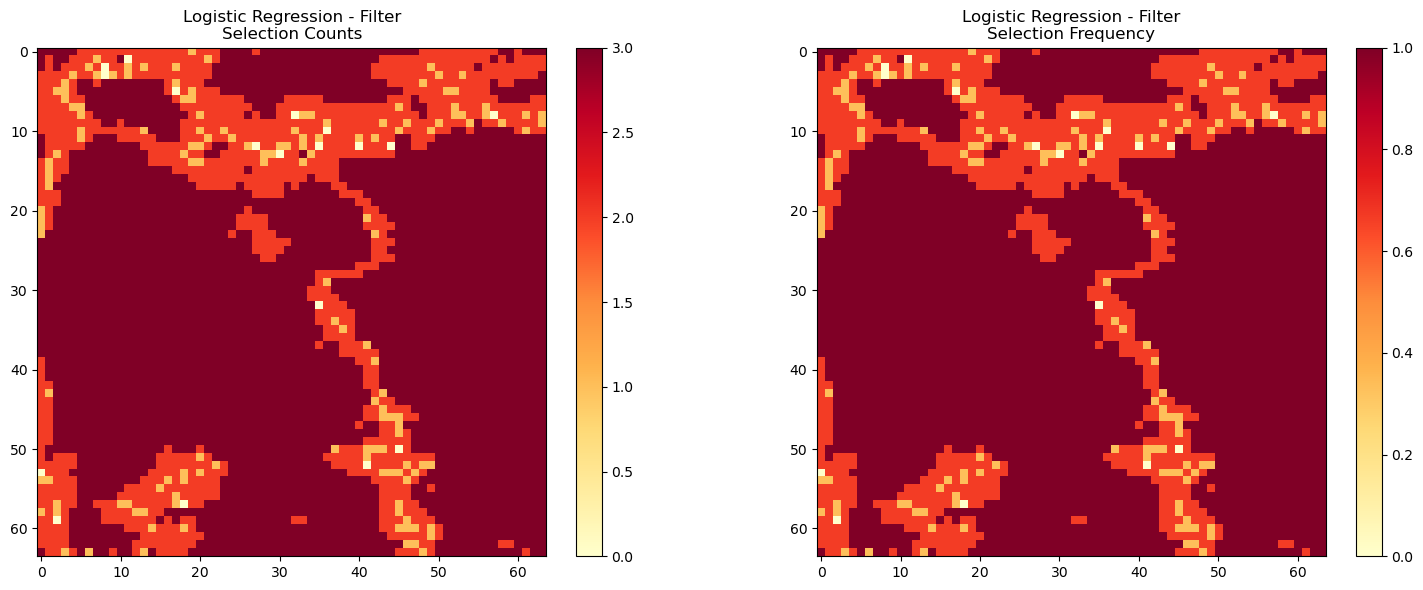


Classifier: Logistic Regression - Method: Lasso
Top 10 most frequently selected features:
  1. Feature 2545 - Selected 3.0/3 times (100.0%)
  2. Feature 3450 - Selected 3.0/3 times (100.0%)
  3. Feature 1904 - Selected 3.0/3 times (100.0%)
  4. Feature 958 - Selected 3.0/3 times (100.0%)
  5. Feature 1936 - Selected 3.0/3 times (100.0%)
  6. Feature 1937 - Selected 3.0/3 times (100.0%)
  7. Feature 2611 - Selected 3.0/3 times (100.0%)
  8. Feature 2166 - Selected 3.0/3 times (100.0%)
  9. Feature 4038 - Selected 3.0/3 times (100.0%)
  10. Feature 2609 - Selected 3.0/3 times (100.0%)


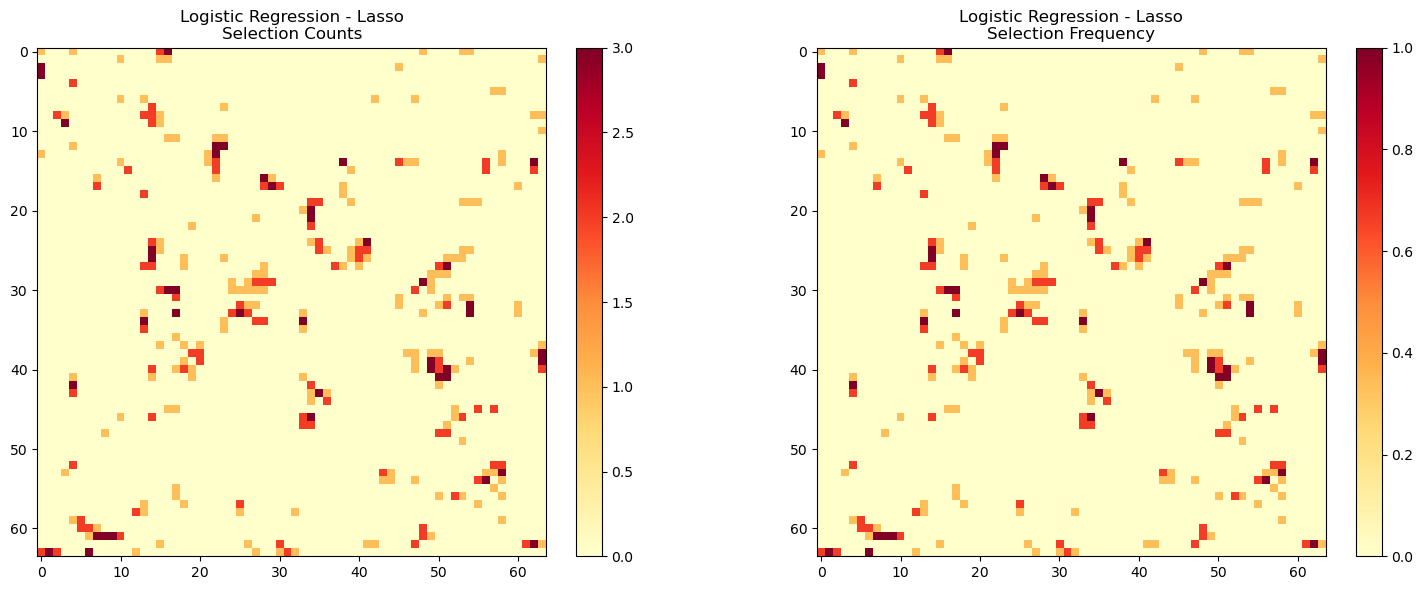


Classifier: SVM - Method: Filter
Top 10 most frequently selected features:
  1. Feature   0 - Selected 3.0/3 times (100.0%)
  2. Feature 2392 - Selected 3.0/3 times (100.0%)
  3. Feature 2393 - Selected 3.0/3 times (100.0%)
  4. Feature 2394 - Selected 3.0/3 times (100.0%)
  5. Feature 2395 - Selected 3.0/3 times (100.0%)
  6. Feature 2396 - Selected 3.0/3 times (100.0%)
  7. Feature 2397 - Selected 3.0/3 times (100.0%)
  8. Feature 2398 - Selected 3.0/3 times (100.0%)
  9. Feature 2399 - Selected 3.0/3 times (100.0%)
  10. Feature 2400 - Selected 3.0/3 times (100.0%)


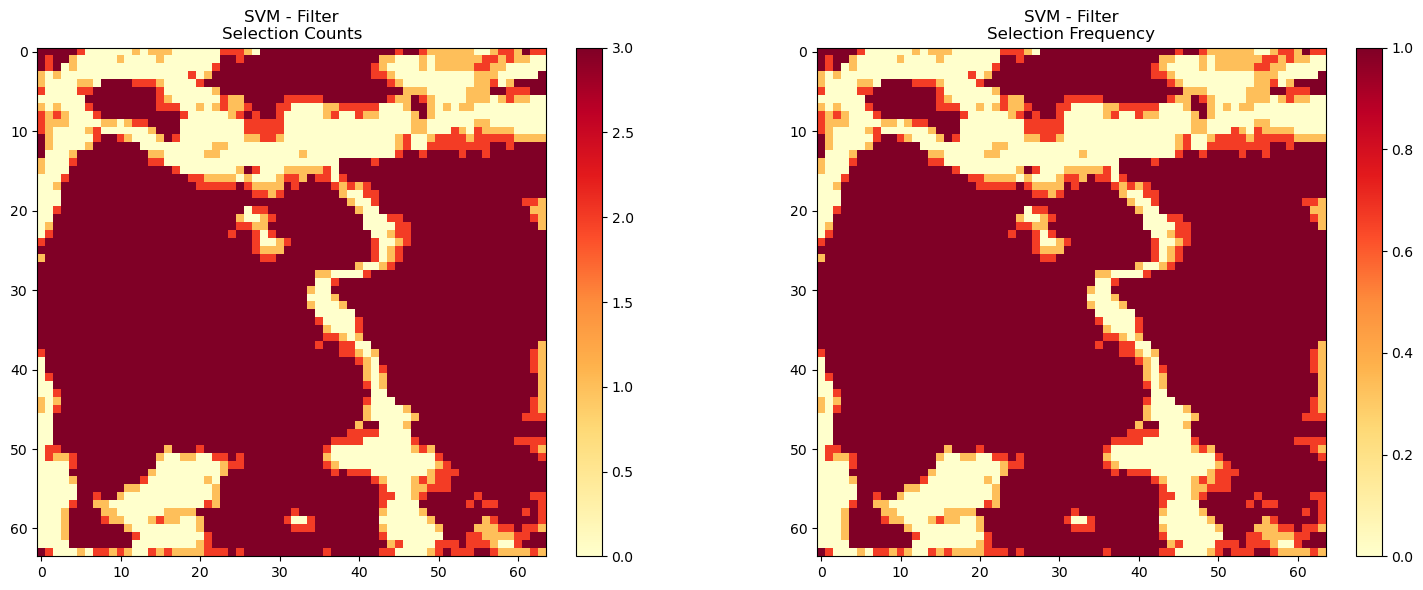


Classifier: Random Forest - Method: Filter
Top 10 most frequently selected features:
  1. Feature 2047 - Selected 3.0/3 times (100.0%)
  2. Feature 1869 - Selected 3.0/3 times (100.0%)
  3. Feature 1870 - Selected 3.0/3 times (100.0%)
  4. Feature 1871 - Selected 3.0/3 times (100.0%)
  5. Feature 1872 - Selected 3.0/3 times (100.0%)
  6. Feature 1873 - Selected 3.0/3 times (100.0%)
  7. Feature 1874 - Selected 3.0/3 times (100.0%)
  8. Feature 1875 - Selected 3.0/3 times (100.0%)
  9. Feature 1876 - Selected 3.0/3 times (100.0%)
  10. Feature 1877 - Selected 3.0/3 times (100.0%)


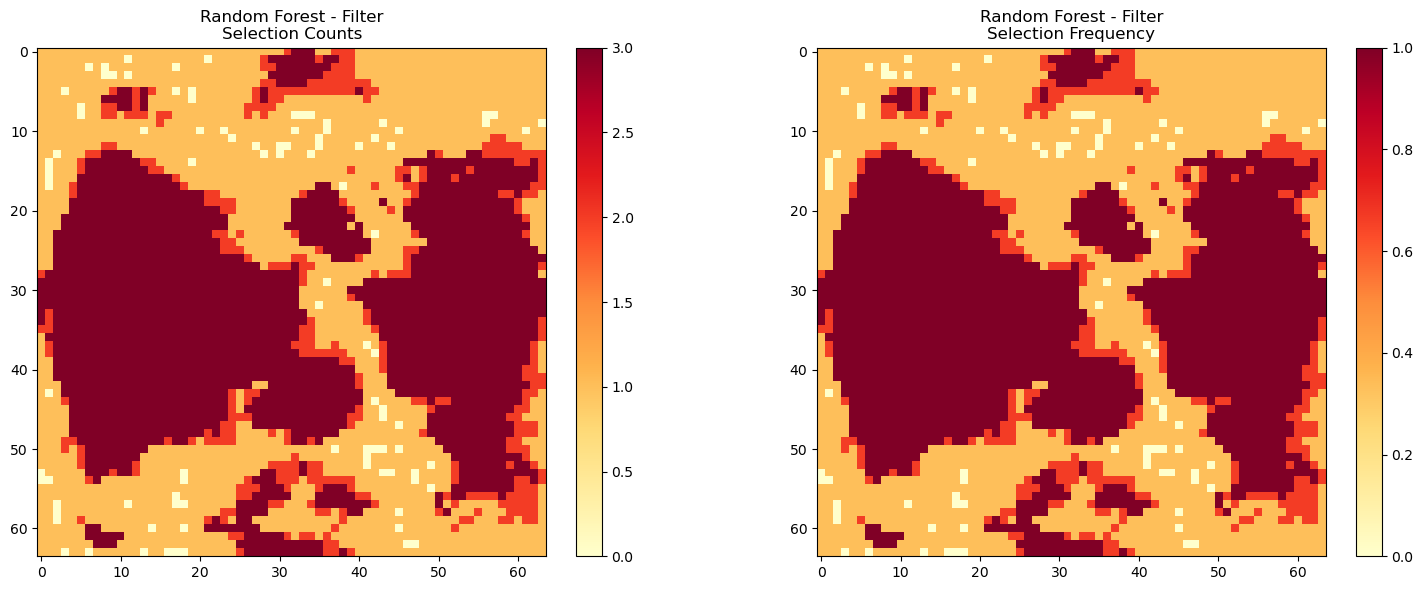

In [ ]:
# 1. Filtering: SelectKBest with ANOVA F-value
filter_pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', None)
])
K_values = [1000, 2000, 3000, 4000]
filter_param_grid = {'selector__k': K_values}

# 2. Embedding: Lasso(Logistic Regression with L1 penalty)
lasso_pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=200))
])
C_values = np.logspace(-3, 1, 7)
lasso_param_grid = {'classifier__C': C_values}


results = defaultdict(lambda: defaultdict(lambda: {
    'num_features': [],
    'selected_indices': [],
    'feature_counts': np.zeros(4096), 
    'feature_freq': np.zeros(4096)    
}))

# --- Run the experiments ---
for run in range(N_RUNs):
    print(f"\n{'='*20} RUN {run+1}/{N_RUNs} {'='*20}")
    current_random_state = run * 42
    
    x_train, x_test, y_train, y_test = train_test_split(
        catdog, labels_cd, test_size=0.2, random_state=current_random_state)
    
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=current_random_state)

    # --- Method 1: Filtering ---
    print("\n--- Filtering ---")
    for clf_name, clf in classifiers.items():
        print(f"Classifier: {clf_name}")
        filter_pipeline.set_params(classifier=clf)
        
        grid_search = GridSearchCV(
            filter_pipeline, 
            filter_param_grid,
            cv=cv, 
            scoring='accuracy', 
            n_jobs=-1
        )
        grid_search.fit(x_train, y_train)

        best_k = grid_search.best_params_['selector__k']
        best_selector = SelectKBest(score_func=f_classif, k=best_k)
        best_selector.fit(x_train, y_train)
        selected_indices = best_selector.get_support(indices=True)


        results[clf_name]['Filter']['feature_counts'][selected_indices] += 1
        results[clf_name]['Filter']['feature_freq'][selected_indices] += 1/N_RUNs
        
        results[clf_name]['Filter']['num_features'].append(best_k)
        results[clf_name]['Filter']['selected_indices'].append(selected_indices)

        print(f"Optimal number of features: {best_k} (Best CV score: {grid_search.best_score_:.4f})")

    # --- Method 2: Embedding ---
    print("\n--- Running Embedded (Lasso with Logistic Regression) ---")
    clf_name = "Logistic Regression"
    print(f"Classifier: {clf_name}")

    grid_search_lasso = GridSearchCV(
        lasso_pipeline, 
        lasso_param_grid,
        cv=cv, 
        scoring='accuracy', 
        n_jobs=-1
    )
    grid_search_lasso.fit(x_train, y_train)

    best_C = grid_search_lasso.best_params_['classifier__C']
    best_lasso_model = grid_search_lasso.best_estimator_.named_steps['classifier']

    non_zero_coeffs = np.sum(np.abs(best_lasso_model.coef_), axis=0) > 1e-10
    num_selected = np.sum(non_zero_coeffs)
    selected_indices = np.where(non_zero_coeffs)[0]


    results[clf_name]['Lasso']['feature_counts'][selected_indices] += 1
    results[clf_name]['Lasso']['feature_freq'][selected_indices] += 1/N_RUNs
    
    results[clf_name]['Lasso']['num_features'].append(num_selected)
    results[clf_name]['Lasso']['selected_indices'].append(selected_indices)

    print(f"Optimal C: {best_C} (Best CV score: {grid_search_lasso.best_score_:.4f})")
    print(f"Selected Features: {num_selected}")


def plot_combined_feature_selection(feature_counts, feature_freq, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    

    im1 = ax1.imshow(feature_counts.reshape(64, 64), cmap='YlOrRd', interpolation='nearest')
    ax1.set_title(f"{title}\nSelection Counts")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    

    im2 = ax2.imshow(feature_freq.reshape(64, 64), cmap='YlOrRd', interpolation='nearest')
    ax2.set_title(f"{title}\nSelection Frequency")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()


print("\n=== Combined Feature Selection Results ===")
for clf_name in classifiers.keys():
    for method_name in results[clf_name].keys():
        if len(results[clf_name][method_name]['selected_indices']) > 0:
            print(f"\nClassifier: {clf_name} - Method: {method_name}")
            
       
            counts = results[clf_name][method_name]['feature_counts']
            freq = results[clf_name][method_name]['feature_freq']
            
          
            top_features = np.argsort(-counts)[:10] 
            print("Top 10 most frequently selected features:")
            for i, feat in enumerate(top_features):
                print(f"  {i+1}. Feature {feat:3d} - Selected {counts[feat]}/{N_RUNs} times ({freq[feat]:.1%})")
            
       
            plot_combined_feature_selection(
                counts, 
                freq,
                f"{clf_name} - {method_name}"
            )


### Part2


==================== RUNNING WITH 80% OF DATA ====================

========== RUN 1/3 ==========

--- Filtering ---
Classifier: Logistic Regression
Optimal number of features: 250 (Best CV score: 0.9266)
Classifier: SVM
Optimal number of features: 200 (Best CV score: 0.9109)
Classifier: Random Forest
Optimal number of features: 250 (Best CV score: 0.9273)

--- Running Embedded (Lasso with Logistic Regression) ---
Classifier: Logistic Regression
Optimal C: 2.154434690031882 (Best CV score: 0.9195)
Selected Features: 214

========== RUN 2/3 ==========

--- Filtering ---
Classifier: Logistic Regression
Optimal number of features: 200 (Best CV score: 0.9125)
Classifier: SVM
Optimal number of features: 200 (Best CV score: 0.8969)
Classifier: Random Forest
Optimal number of features: 250 (Best CV score: 0.9234)

--- Running Embedded (Lasso with Logistic Regression) ---
Classifier: Logistic Regression
Optimal C: 2.154434690031882 (Best CV score: 0.9039)
Selected Features: 222

========== RU

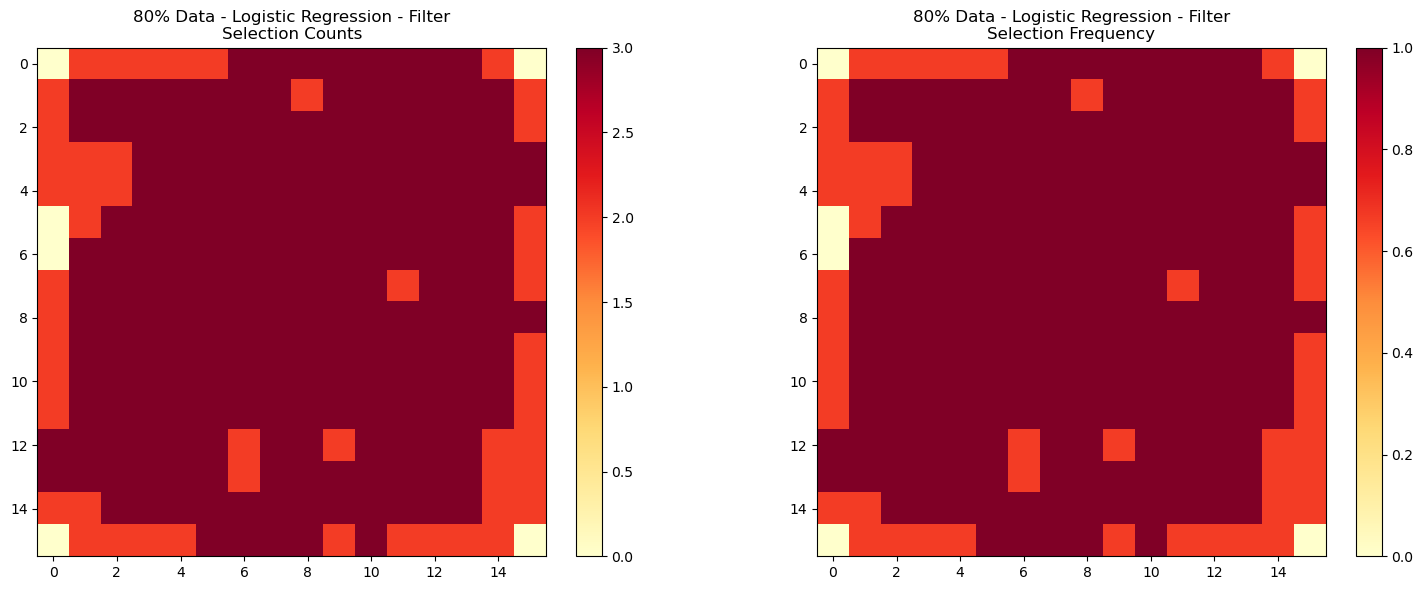


Classifier: Logistic Regression - Method: Lasso
Top 10 most frequently selected features:
  1. Feature 127 - Selected 3.0/3 times (100.0%)
  2. Feature 125 - Selected 3.0/3 times (100.0%)
  3. Feature 126 - Selected 3.0/3 times (100.0%)
  4. Feature 228 - Selected 3.0/3 times (100.0%)
  5. Feature 227 - Selected 3.0/3 times (100.0%)
  6. Feature 130 - Selected 3.0/3 times (100.0%)
  7. Feature 131 - Selected 3.0/3 times (100.0%)
  8. Feature 133 - Selected 3.0/3 times (100.0%)
  9. Feature 134 - Selected 3.0/3 times (100.0%)
  10. Feature 135 - Selected 3.0/3 times (100.0%)


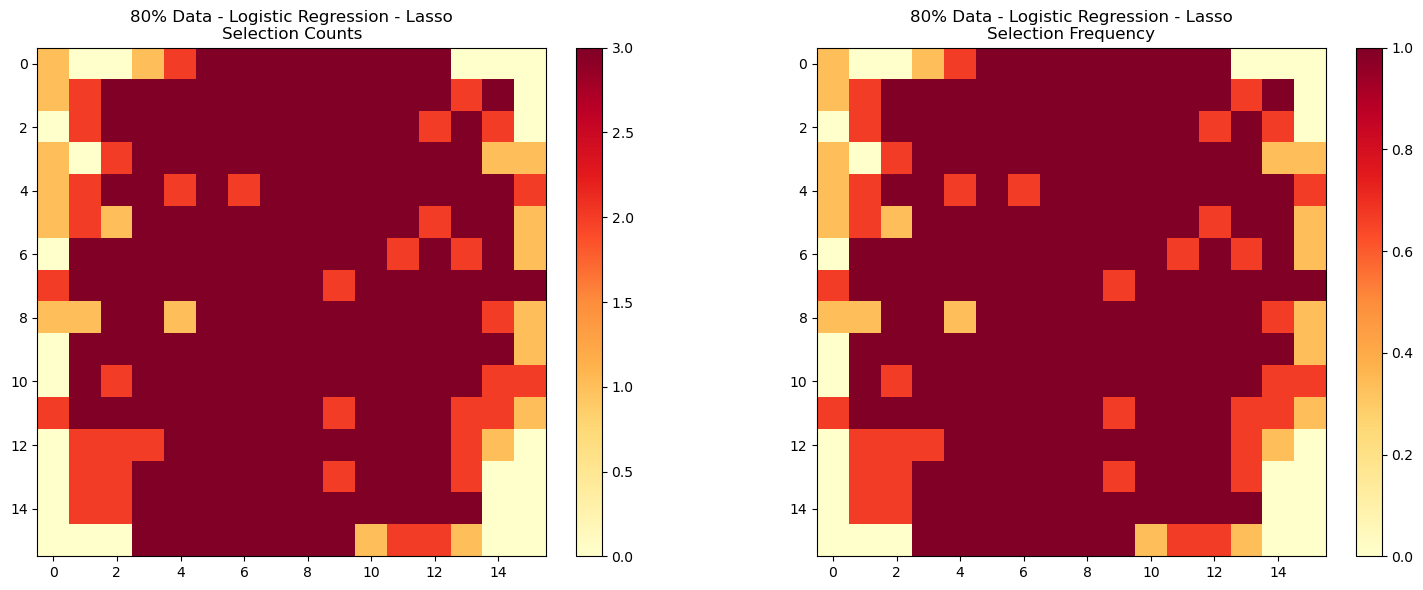


Classifier: SVM - Method: Filter
Top 10 most frequently selected features:
  1. Feature 124 - Selected 3.0/3 times (100.0%)
  2. Feature 126 - Selected 3.0/3 times (100.0%)
  3. Feature 212 - Selected 3.0/3 times (100.0%)
  4. Feature 211 - Selected 3.0/3 times (100.0%)
  5. Feature 129 - Selected 3.0/3 times (100.0%)
  6. Feature 130 - Selected 3.0/3 times (100.0%)
  7. Feature 131 - Selected 3.0/3 times (100.0%)
  8. Feature 132 - Selected 3.0/3 times (100.0%)
  9. Feature 133 - Selected 3.0/3 times (100.0%)
  10. Feature 134 - Selected 3.0/3 times (100.0%)


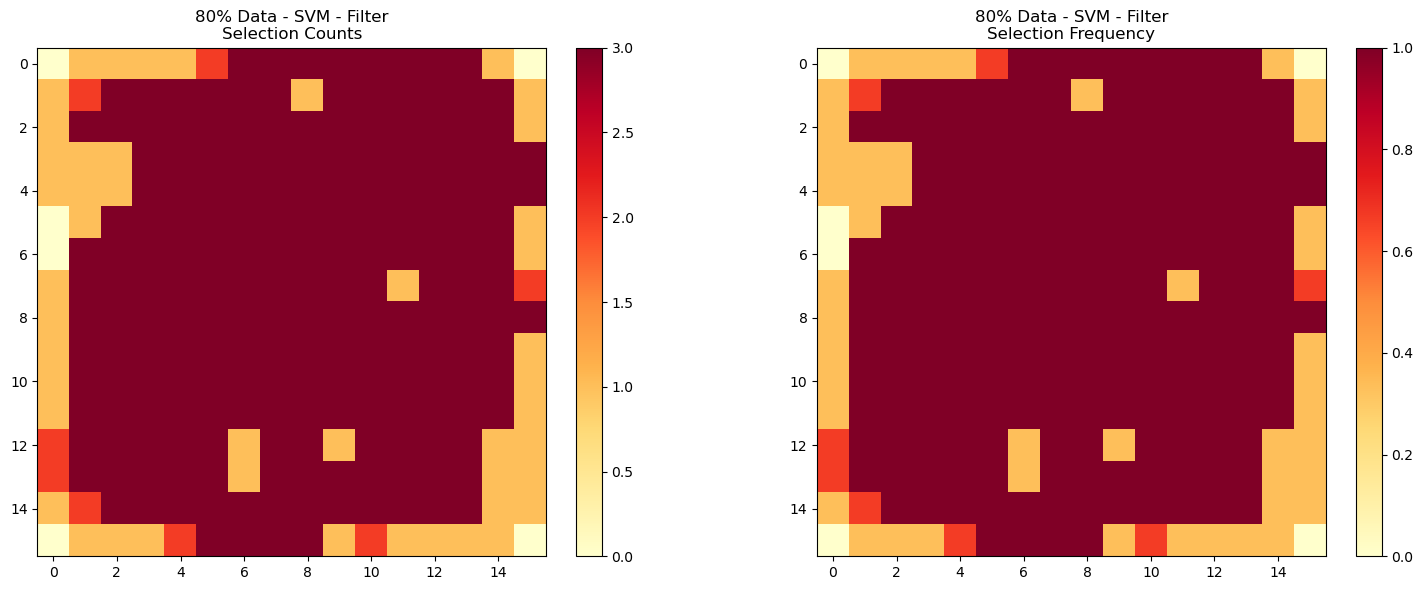


Classifier: Random Forest - Method: Filter
Top 10 most frequently selected features:
  1. Feature 127 - Selected 3.0/3 times (100.0%)
  2. Feature 157 - Selected 3.0/3 times (100.0%)
  3. Feature 158 - Selected 3.0/3 times (100.0%)
  4. Feature 159 - Selected 3.0/3 times (100.0%)
  5. Feature 160 - Selected 3.0/3 times (100.0%)
  6. Feature 161 - Selected 3.0/3 times (100.0%)
  7. Feature 162 - Selected 3.0/3 times (100.0%)
  8. Feature 163 - Selected 3.0/3 times (100.0%)
  9. Feature 164 - Selected 3.0/3 times (100.0%)
  10. Feature 165 - Selected 3.0/3 times (100.0%)


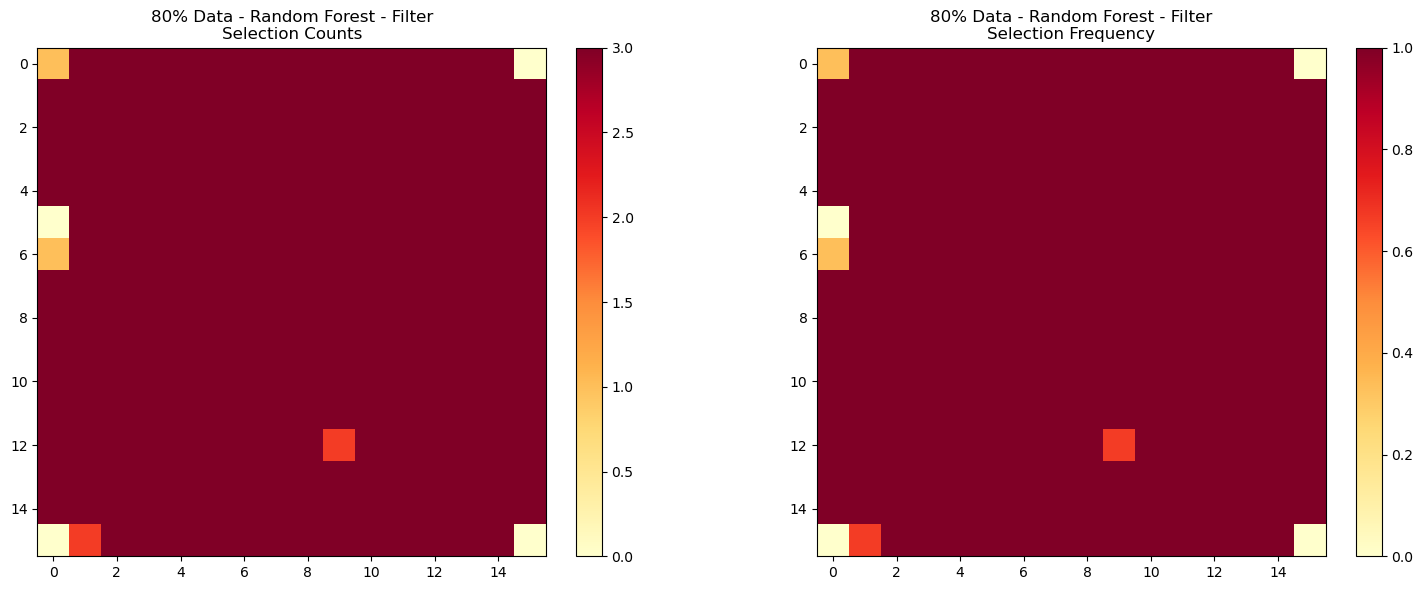


==================== RESULTS WITH 50% OF DATA ====================

Classifier: Logistic Regression - Method: Filter
Top 10 most frequently selected features:
  1. Feature 106 - Selected 3.0/3 times (100.0%)
  2. Feature 132 - Selected 3.0/3 times (100.0%)
  3. Feature 133 - Selected 3.0/3 times (100.0%)
  4. Feature 134 - Selected 3.0/3 times (100.0%)
  5. Feature 135 - Selected 3.0/3 times (100.0%)
  6. Feature 136 - Selected 3.0/3 times (100.0%)
  7. Feature 137 - Selected 3.0/3 times (100.0%)
  8. Feature 138 - Selected 3.0/3 times (100.0%)
  9. Feature 139 - Selected 3.0/3 times (100.0%)
  10. Feature 140 - Selected 3.0/3 times (100.0%)


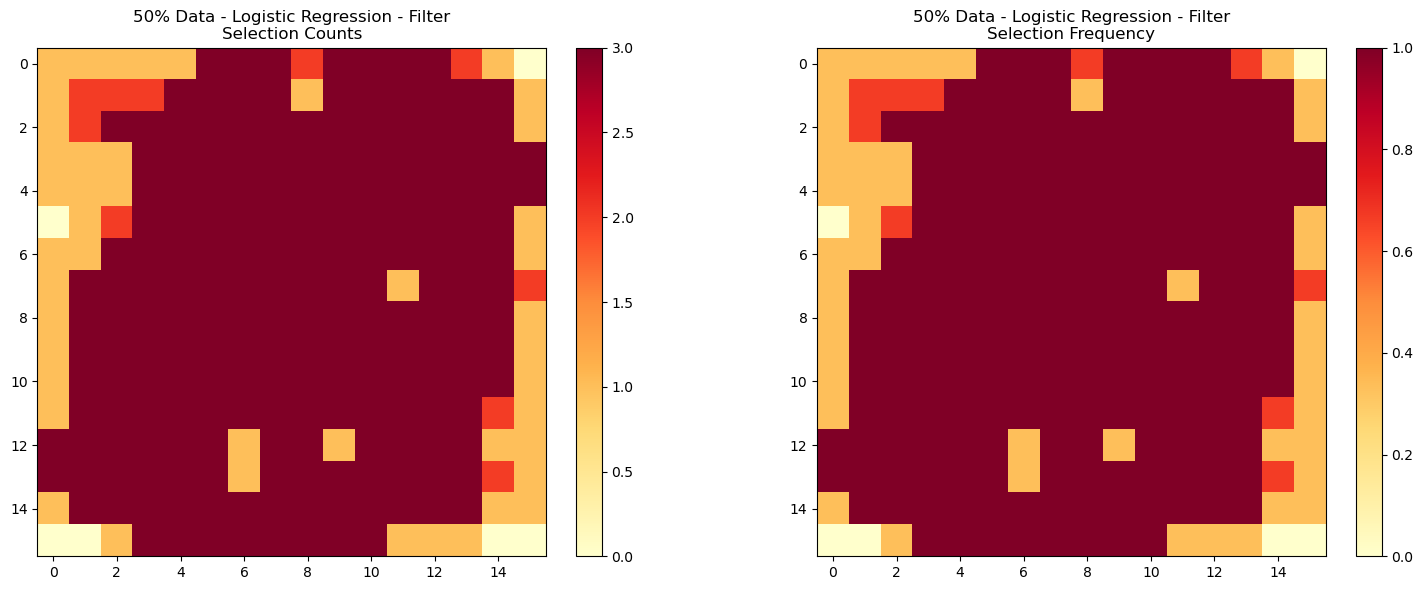


Classifier: Logistic Regression - Method: Lasso
Top 10 most frequently selected features:
  1. Feature 228 - Selected 3.0/3 times (100.0%)
  2. Feature 109 - Selected 3.0/3 times (100.0%)
  3. Feature 110 - Selected 3.0/3 times (100.0%)
  4. Feature 195 - Selected 3.0/3 times (100.0%)
  5. Feature 194 - Selected 3.0/3 times (100.0%)
  6. Feature 115 - Selected 3.0/3 times (100.0%)
  7. Feature 116 - Selected 3.0/3 times (100.0%)
  8. Feature 117 - Selected 3.0/3 times (100.0%)
  9. Feature 118 - Selected 3.0/3 times (100.0%)
  10. Feature 119 - Selected 3.0/3 times (100.0%)


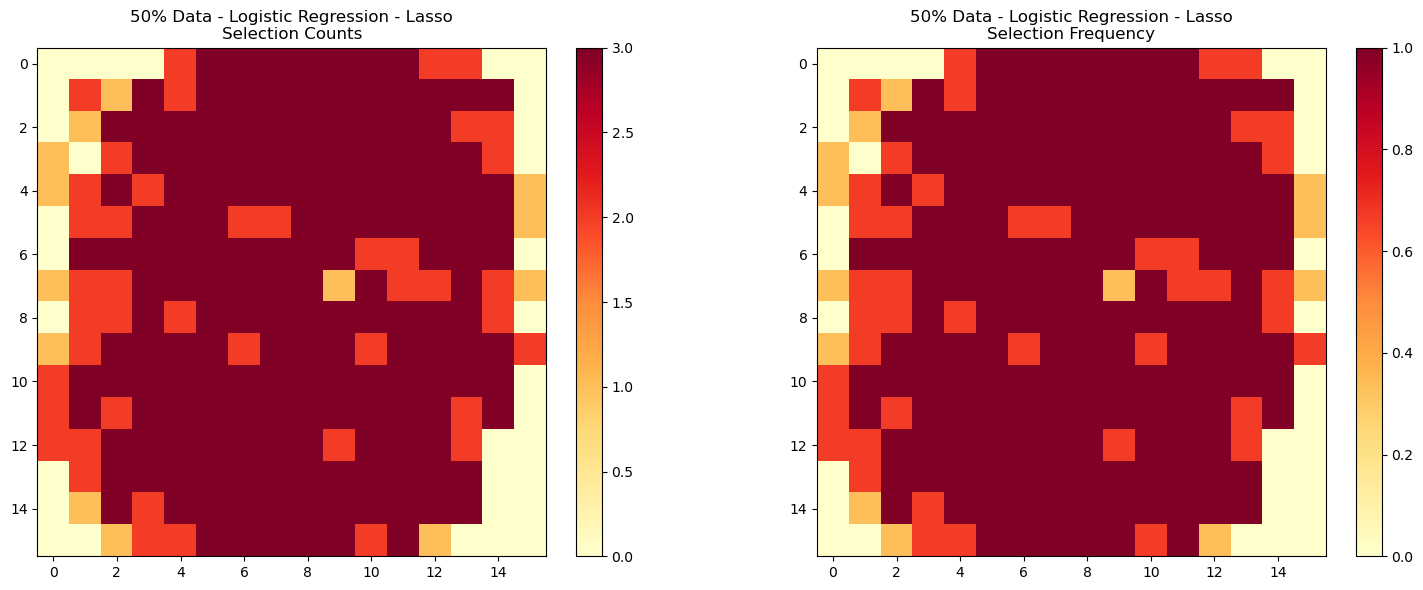


Classifier: SVM - Method: Filter
Top 10 most frequently selected features:
  1. Feature 124 - Selected 3.0/3 times (100.0%)
  2. Feature 104 - Selected 3.0/3 times (100.0%)
  3. Feature 105 - Selected 3.0/3 times (100.0%)
  4. Feature 106 - Selected 3.0/3 times (100.0%)
  5. Feature 108 - Selected 3.0/3 times (100.0%)
  6. Feature 109 - Selected 3.0/3 times (100.0%)
  7. Feature 184 - Selected 3.0/3 times (100.0%)
  8. Feature 183 - Selected 3.0/3 times (100.0%)
  9. Feature 103 - Selected 3.0/3 times (100.0%)
  10. Feature 181 - Selected 3.0/3 times (100.0%)


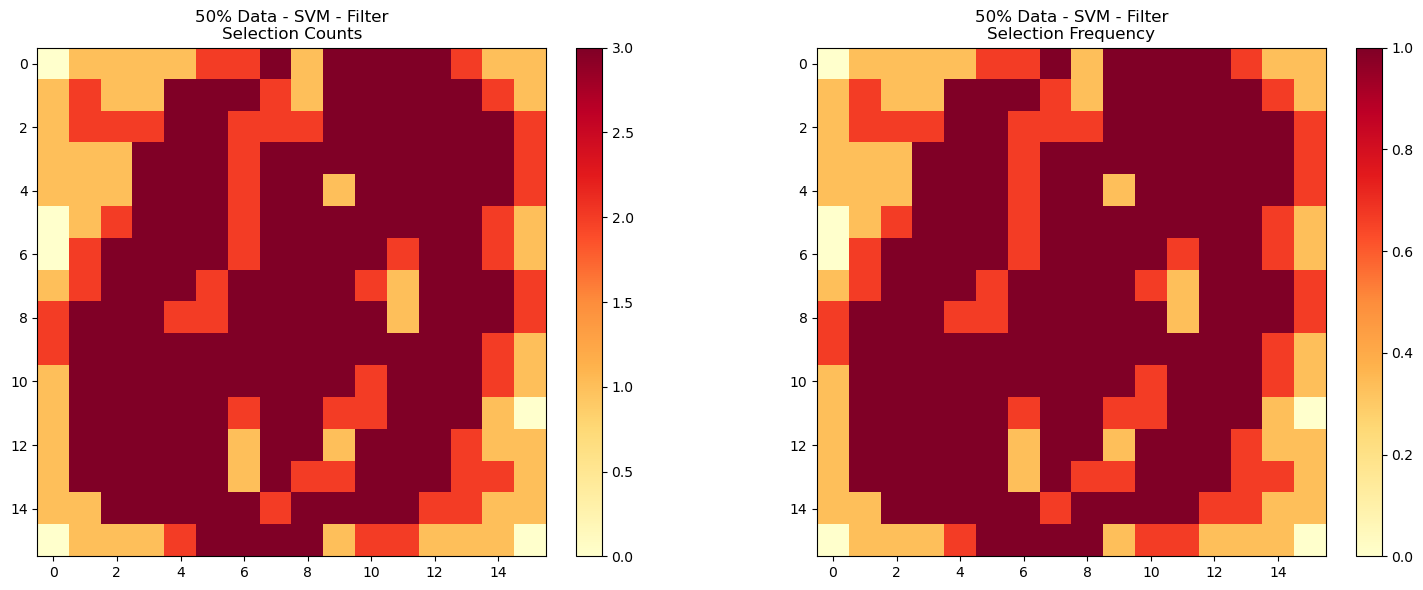


Classifier: Random Forest - Method: Filter
Top 10 most frequently selected features:
  1. Feature 124 - Selected 3.0/3 times (100.0%)
  2. Feature 104 - Selected 3.0/3 times (100.0%)
  3. Feature 105 - Selected 3.0/3 times (100.0%)
  4. Feature 106 - Selected 3.0/3 times (100.0%)
  5. Feature 108 - Selected 3.0/3 times (100.0%)
  6. Feature 109 - Selected 3.0/3 times (100.0%)
  7. Feature 184 - Selected 3.0/3 times (100.0%)
  8. Feature 183 - Selected 3.0/3 times (100.0%)
  9. Feature 103 - Selected 3.0/3 times (100.0%)
  10. Feature 181 - Selected 3.0/3 times (100.0%)


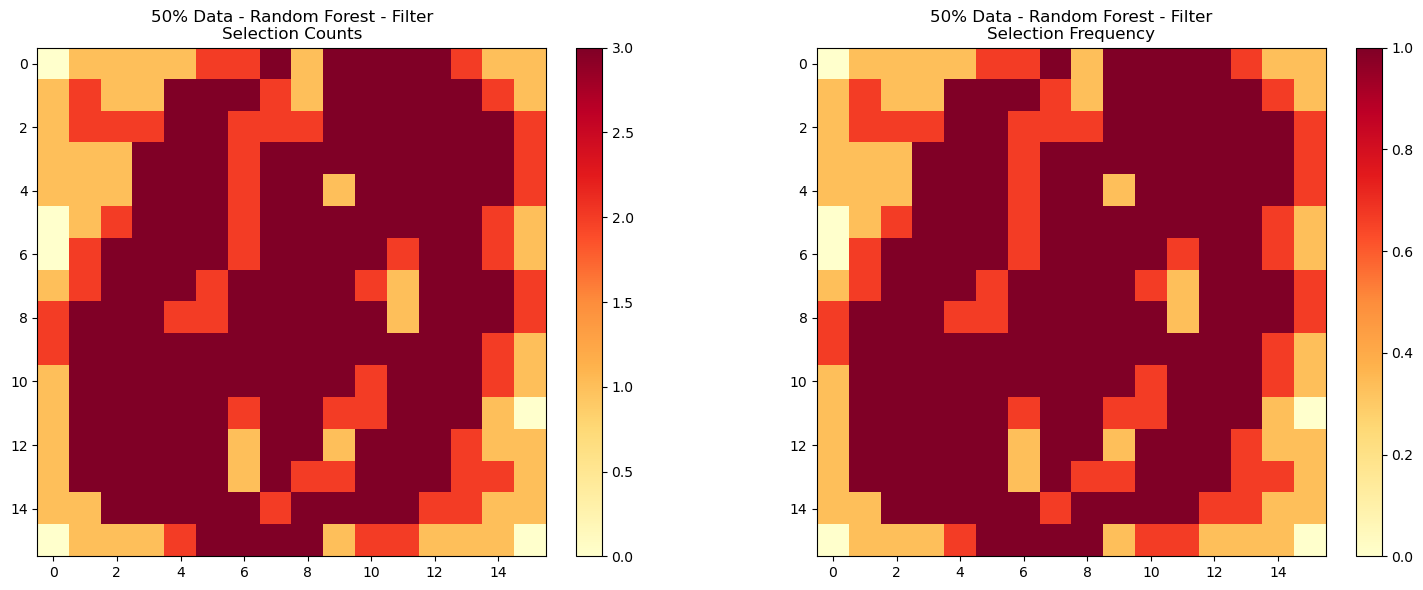


==================== RESULTS WITH 20% OF DATA ====================

Classifier: Logistic Regression - Method: Filter
Top 10 most frequently selected features:
  1. Feature 107 - Selected 3.0/3 times (100.0%)
  2. Feature 130 - Selected 3.0/3 times (100.0%)
  3. Feature 131 - Selected 3.0/3 times (100.0%)
  4. Feature 132 - Selected 3.0/3 times (100.0%)
  5. Feature 134 - Selected 3.0/3 times (100.0%)
  6. Feature 135 - Selected 3.0/3 times (100.0%)
  7. Feature 136 - Selected 3.0/3 times (100.0%)
  8. Feature 137 - Selected 3.0/3 times (100.0%)
  9. Feature 138 - Selected 3.0/3 times (100.0%)
  10. Feature 139 - Selected 3.0/3 times (100.0%)


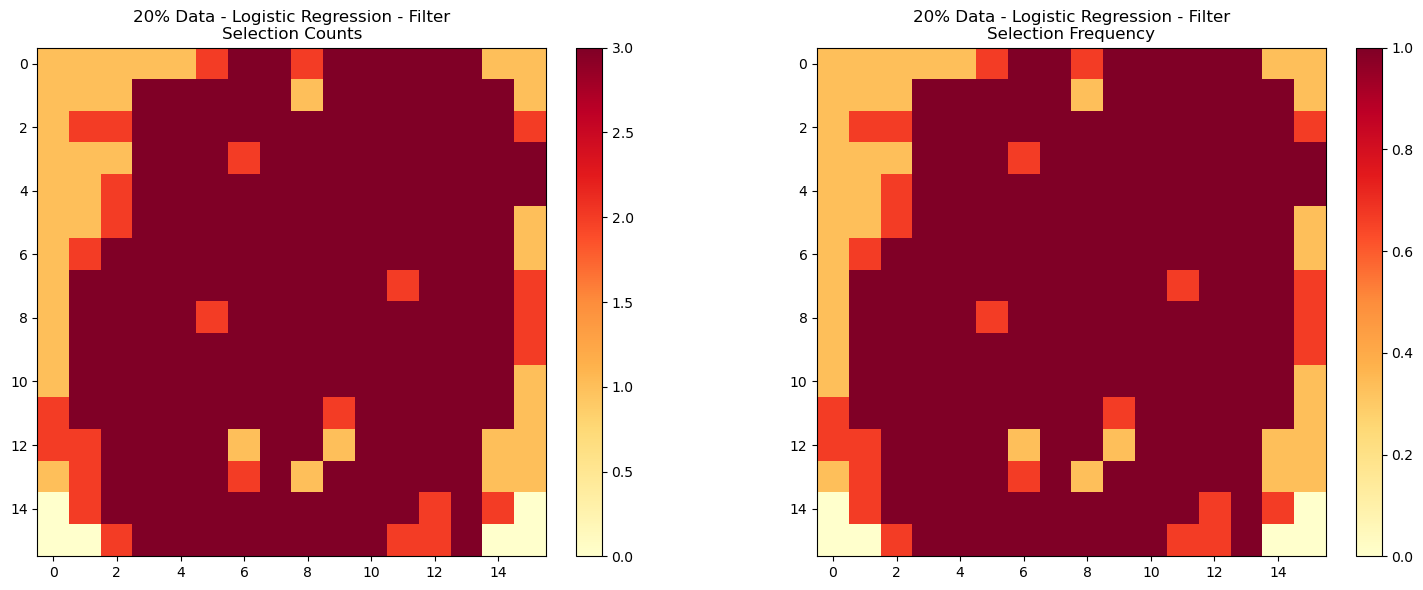


Classifier: Logistic Regression - Method: Lasso
Top 10 most frequently selected features:
  1. Feature 213 - Selected 3.0/3 times (100.0%)
  2. Feature  86 - Selected 3.0/3 times (100.0%)
  3. Feature  85 - Selected 3.0/3 times (100.0%)
  4. Feature  84 - Selected 3.0/3 times (100.0%)
  5. Feature  83 - Selected 3.0/3 times (100.0%)
  6. Feature 150 - Selected 3.0/3 times (100.0%)
  7. Feature 151 - Selected 3.0/3 times (100.0%)
  8. Feature 152 - Selected 3.0/3 times (100.0%)
  9. Feature 153 - Selected 3.0/3 times (100.0%)
  10. Feature 154 - Selected 3.0/3 times (100.0%)


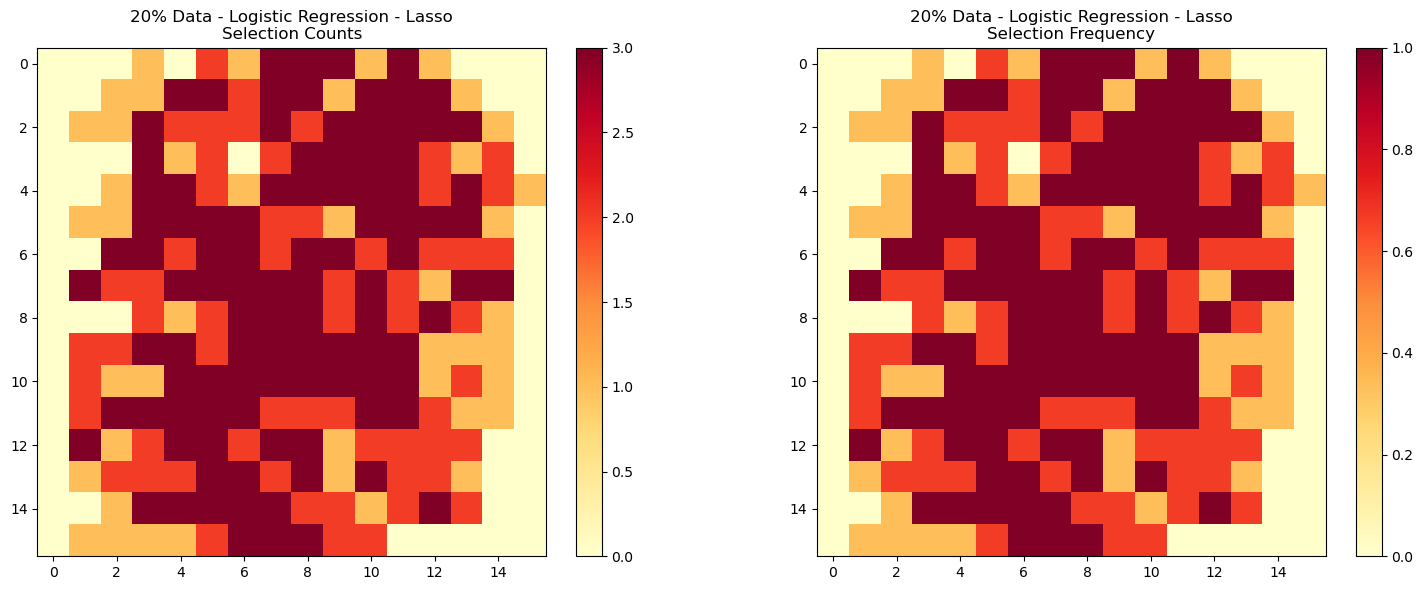


Classifier: SVM - Method: Filter
Top 10 most frequently selected features:
  1. Feature 219 - Selected 3.0/3 times (100.0%)
  2. Feature 119 - Selected 3.0/3 times (100.0%)
  3. Feature 120 - Selected 3.0/3 times (100.0%)
  4. Feature 121 - Selected 3.0/3 times (100.0%)
  5. Feature 124 - Selected 3.0/3 times (100.0%)
  6. Feature 125 - Selected 3.0/3 times (100.0%)
  7. Feature 213 - Selected 3.0/3 times (100.0%)
  8. Feature 212 - Selected 3.0/3 times (100.0%)
  9. Feature 129 - Selected 3.0/3 times (100.0%)
  10. Feature 130 - Selected 3.0/3 times (100.0%)


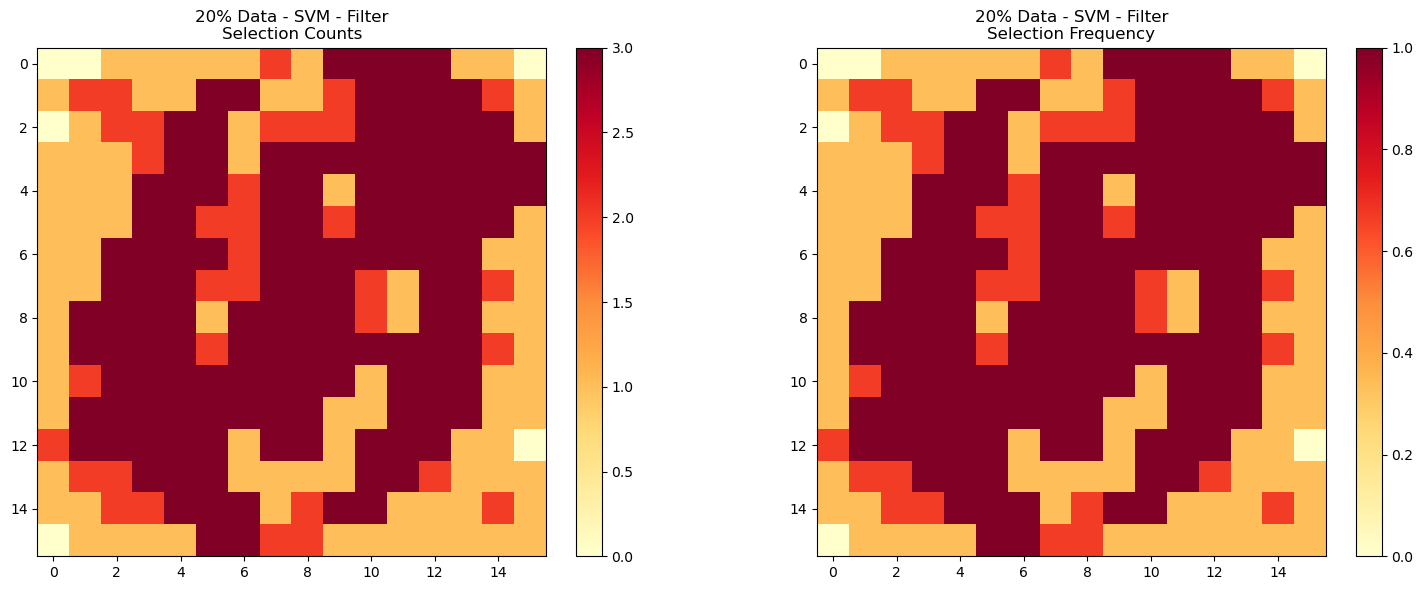


Classifier: Random Forest - Method: Filter
Top 10 most frequently selected features:
  1. Feature  79 - Selected 3.0/3 times (100.0%)
  2. Feature 101 - Selected 3.0/3 times (100.0%)
  3. Feature 171 - Selected 3.0/3 times (100.0%)
  4. Feature 103 - Selected 3.0/3 times (100.0%)
  5. Feature 104 - Selected 3.0/3 times (100.0%)
  6. Feature 105 - Selected 3.0/3 times (100.0%)
  7. Feature 106 - Selected 3.0/3 times (100.0%)
  8. Feature 107 - Selected 3.0/3 times (100.0%)
  9. Feature 108 - Selected 3.0/3 times (100.0%)
  10. Feature 109 - Selected 3.0/3 times (100.0%)


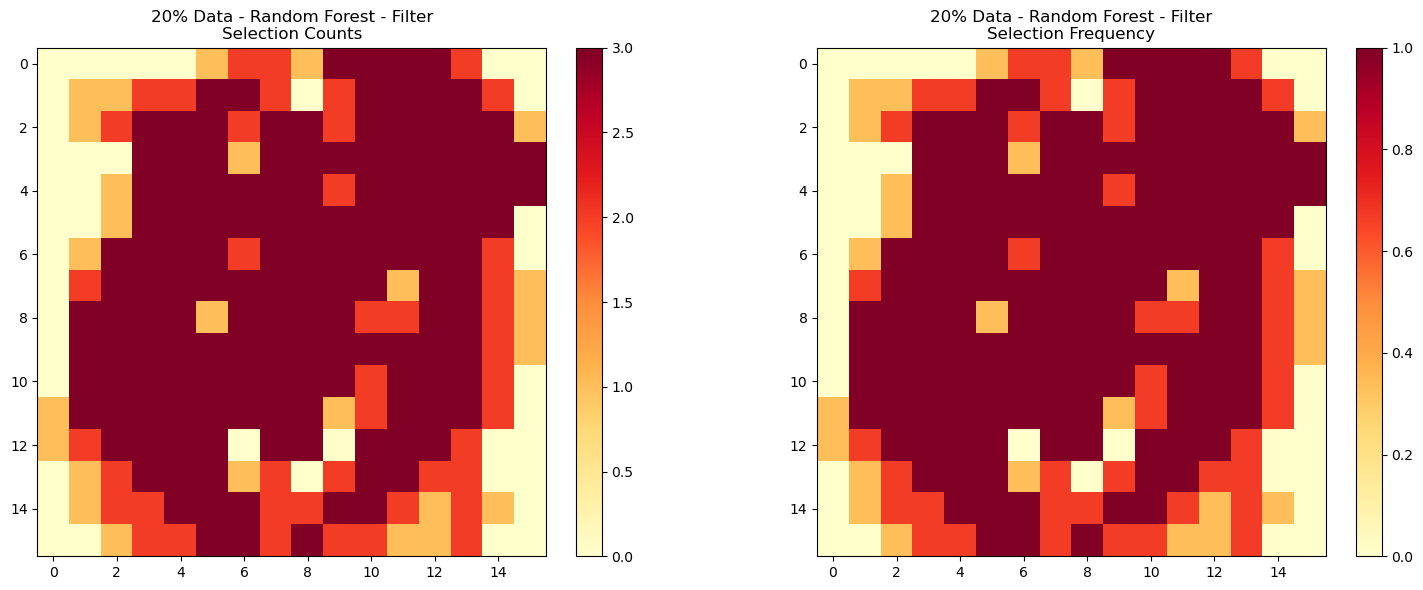

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration ---
N_RUNs = 3  # Number of runs for the experiment
CV_FOLDS = 5  # Number of folds for cross-validation
DATA_PERCENTAGES = [0.8, 0.5, 0.2]  # Percentages of total data to use

# --- Define the models ---
LR = LogisticRegression(solver='liblinear', max_iter=200)
SVM = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000)
RF = RandomForestClassifier(n_estimators=100)

classifiers = {
    "Logistic Regression": LR,
    "SVM": SVM,
    "Random Forest": RF
}

# 1. Filtering: SelectKBest with ANOVA F-value
filter_pipeline = Pipeline([
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', None)
])
K_values = [50, 100, 150, 200, 250]
filter_param_grid = {'selector__k': K_values}

# 2. Embedding: Lasso(Logistic Regression with L1 penalty)
lasso_pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', max_iter=200))
])
C_values = np.logspace(-3, 1, 7)
lasso_param_grid = {'classifier__C': C_values}

# 初始化结果存储结构
results = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {
    'num_features': [],
    'selected_indices': [],
    'feature_counts': np.zeros(256), 
    'feature_freq': np.zeros(256)     
})))

# --- Run the experiments ---
for data_percentage in DATA_PERCENTAGES:
    print(f"\n{'='*20} RUNNING WITH {data_percentage*100:.0f}% OF DATA {'='*20}")
    
    for run in range(N_RUNs):
        print(f"\n{'='*10} RUN {run+1}/{N_RUNs} {'='*10}")
        current_random_state = run * 42
        
        # First split to get the desired percentage of total data
        x_temp, _, y_temp, _ = train_test_split(
            images, labels, 
            train_size=data_percentage, 
            random_state=current_random_state,
            stratify=labels
        )
        
        # Then split into train/test (keeping test size consistent)
        x_train, x_test, y_train, y_test = train_test_split(
            x_temp, y_temp, 
            test_size=0.2, 
            random_state=current_random_state,
            stratify=y_temp
        )
        
        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
        
        cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=current_random_state)

        # --- Method 1: Filtering ---
        print("\n--- Filtering ---")
        for clf_name, clf in classifiers.items():
            print(f"Classifier: {clf_name}")
            filter_pipeline.set_params(classifier=clf)
            
            grid_search = GridSearchCV(
                filter_pipeline, 
                filter_param_grid,
                cv=cv, 
                scoring='accuracy', 
                n_jobs=-1
            )
            grid_search.fit(x_train, y_train)

            best_k = grid_search.best_params_['selector__k']
            best_selector = SelectKBest(score_func=f_classif, k=best_k)
            best_selector.fit(x_train, y_train)
            selected_indices = best_selector.get_support(indices=True)

          
            results[data_percentage][clf_name]['Filter']['feature_counts'][selected_indices] += 1
            results[data_percentage][clf_name]['Filter']['feature_freq'][selected_indices] += 1/N_RUNs
            
            results[data_percentage][clf_name]['Filter']['num_features'].append(best_k)
            results[data_percentage][clf_name]['Filter']['selected_indices'].append(selected_indices)

            print(f"Optimal number of features: {best_k} (Best CV score: {grid_search.best_score_:.4f})")

        # --- Method 2: Embedding ---
        print("\n--- Running Embedded (Lasso with Logistic Regression) ---")
        clf_name = "Logistic Regression"
        print(f"Classifier: {clf_name}")

        grid_search_lasso = GridSearchCV(
            lasso_pipeline, 
            lasso_param_grid,
            cv=cv, 
            scoring='accuracy', 
            n_jobs=-1
        )
        grid_search_lasso.fit(x_train, y_train)

        best_C = grid_search_lasso.best_params_['classifier__C']
        best_lasso_model = grid_search_lasso.best_estimator_.named_steps['classifier']

        non_zero_coeffs = np.sum(np.abs(best_lasso_model.coef_), axis=0) > 1e-10
        num_selected = np.sum(non_zero_coeffs)
        selected_indices = np.where(non_zero_coeffs)[0]


        results[data_percentage][clf_name]['Lasso']['feature_counts'][selected_indices] += 1
        results[data_percentage][clf_name]['Lasso']['feature_freq'][selected_indices] += 1/N_RUNs
        
        results[data_percentage][clf_name]['Lasso']['num_features'].append(num_selected)
        results[data_percentage][clf_name]['Lasso']['selected_indices'].append(selected_indices)

        print(f"Optimal C: {best_C} (Best CV score: {grid_search_lasso.best_score_:.4f})")
        print(f"Selected Features: {num_selected}")

def plot_combined_feature_selection(feature_counts, feature_freq, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
   
    im1 = ax1.imshow(feature_counts.reshape(16, 16), cmap='YlOrRd', interpolation='nearest')
    ax1.set_title(f"{title}\nSelection Counts")
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    
    
    im2 = ax2.imshow(feature_freq.reshape(16, 16), cmap='YlOrRd', interpolation='nearest')
    ax2.set_title(f"{title}\nSelection Frequency")
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()


print("\n=== Combined Feature Selection Results ===")
for data_percentage in DATA_PERCENTAGES:
    print(f"\n{'='*20} RESULTS WITH {data_percentage*100:.0f}% OF DATA {'='*20}")
    
    for clf_name in classifiers.keys():
        for method_name in results[data_percentage][clf_name].keys():
            if len(results[data_percentage][clf_name][method_name]['selected_indices']) > 0:
                print(f"\nClassifier: {clf_name} - Method: {method_name}")
                
               
                counts = results[data_percentage][clf_name][method_name]['feature_counts']
                freq = results[data_percentage][clf_name][method_name]['feature_freq']
                
               
                top_features = np.argsort(-counts)[:10] 
                print("Top 10 most frequently selected features:")
                for i, feat in enumerate(top_features):
                    print(f"  {i+1}. Feature {feat:3d} - Selected {counts[feat]}/{N_RUNs} times ({freq[feat]:.1%})")
                
                
                plot_combined_feature_selection(
                    counts, 
                    freq,
                    f"{data_percentage*100:.0f}% Data - {clf_name} - {method_name}"
                )